In [7]:
"""
GENERAL OPTIONS:

    regime: SOLO (MSFT)
    kinds:  YIELD ITSELF
    
"""
pass

In [8]:
import json
import time
import numpy
import pandas
from data.flat import load

E:\venv\financial_news_re\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [9]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [10]:
# k = 'C:/Users/MainUser/Desktop/AlphaVantage.txt'
k = 'C:/Users/MainUser/Desktop/OpenAPI_sandbox.txt'
crs = open(k, "r")
for columns in ( raw.strip().split() for raw in crs ):
    api_key = columns[0]

In [11]:
target_quotes = ['MSFT']
news_horizon = 100
effect_horizon = 10

In [12]:
data = await load(api_key, target_quotes, news_horizon, effect_horizon)
data

E:\venv\financial_news_re\lib\site-packages\pandas\core\arrays\datetimelike.py:1265: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  warnings.warn(


2019-08-29 22:27:30.057000
2019-10-05 08:07:58.138000
(9625,)


,id,title,lag,news_time,ticker,time,open_HOZ0_PCT1,close_HOZ0_PCT1,high_HOZ0_PCT1,low_HOZ0_PCT1,...,open_HOZ9_PCT1,close_HOZ9_PCT1,high_HOZ9_PCT1,low_HOZ9_PCT1,volume_HOZ9_PCT1,open_HOZ10_PCT1,close_HOZ10_PCT1,high_HOZ10_PCT1,low_HOZ10_PCT1,volume_HOZ10_PCT1
0,141465.0,"Shares rally, bond yields rise as China fuels ...",4.0,2019-08-29 22:36:30.057,None,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141465.0,"Shares rally, bond yields rise as China fuels ...",5.0,2019-08-29 22:36:30.057,None,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,141465.0,"Shares rally, bond yields rise as China fuels ...",12.0,2019-08-29 22:36:30.057,None,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,141465.0,"Shares rally, bond yields rise as China fuels ...",20.0,2019-08-29 22:36:30.057,MSFT,2019-08-29 22:57:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,141465.0,"Shares rally, bond yields rise as China fuels ...",22.0,2019-08-29 22:36:30.057,MSFT,2019-08-29 22:59:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993325,NaN,None,NaN,NaT,MSFT,2019-09-17 23:46:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993326,NaN,None,NaN,NaT,MSFT,2019-09-05 08:49:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993327,NaN,None,NaN,NaT,MSFT,2019-09-13 08:19:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993328,NaN,None,NaN,NaT,MSFT,2019-09-27 21:55:00+00:00,-0.00029,-0.00029,-0.00029,-0.00029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
a = data.sort_values(by=['id', 'time'])
a = a[~a['title'].isna() & ~a['open_HOZ0_PCT1'].isna()]
data = a.copy()
del a
data

,id,title,lag,news_time,ticker,time,open_HOZ0_PCT1,close_HOZ0_PCT1,high_HOZ0_PCT1,low_HOZ0_PCT1,...,open_HOZ9_PCT1,close_HOZ9_PCT1,high_HOZ9_PCT1,low_HOZ9_PCT1,volume_HOZ9_PCT1,open_HOZ10_PCT1,close_HOZ10_PCT1,high_HOZ10_PCT1,low_HOZ10_PCT1,volume_HOZ10_PCT1
32144,153793.0,Saudi Aramco reportedly favors Tokyo for its o...,92.0,2019-08-30 05:38:18.254,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32158,153852.0,METALS-Shanghai nickel hits record high as was...,90.0,2019-08-30 05:40:51.648,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32172,153853.0,UPDATE 3-General Electric wins partial dismiss...,90.0,2019-08-30 05:40:51.648,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32186,153969.0,Verdict delayed for 2 Cambodia journalists in ...,89.0,2019-08-30 05:41:05.198,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32199,154088.0,Hong Kong pro-democracy group says Joshua Wong...,79.0,2019-08-30 05:51:34.623,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975935,390584.0,Saudi crown prince on Khashoggi killing: ‘I ge...,6.0,2019-09-26 21:46:49.527,MSFT,2019-09-26 21:53:00+00:00,-0.000143,0.000000,0.000000,-0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250795,390604.0,Naval base in Syria cements Russia’s Mediterra...,5.0,2019-09-26 21:46:49.527,MSFT,2019-09-26 21:52:00+00:00,0.000143,0.000143,0.000143,0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975950,390604.0,Naval base in Syria cements Russia’s Mediterra...,6.0,2019-09-26 21:46:49.527,MSFT,2019-09-26 21:53:00+00:00,-0.000143,0.000000,0.000000,-0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250805,390605.0,"The Latest: Palestinian leader slams Israel, U...",5.0,2019-09-26 21:46:49.527,MSFT,2019-09-26 21:52:00+00:00,0.000143,0.000143,0.000143,0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data = data.dropna()
data

,id,title,lag,news_time,ticker,time,open_HOZ0_PCT1,close_HOZ0_PCT1,high_HOZ0_PCT1,low_HOZ0_PCT1,...,open_HOZ9_PCT1,close_HOZ9_PCT1,high_HOZ9_PCT1,low_HOZ9_PCT1,volume_HOZ9_PCT1,open_HOZ10_PCT1,close_HOZ10_PCT1,high_HOZ10_PCT1,low_HOZ10_PCT1,volume_HOZ10_PCT1
779022,159990.0,Learn while you earn,96.0,2019-08-30 12:01:17.847,MSFT,2019-08-30 13:38:00+00:00,0.000722,0.000144,0.000216,-0.000217,...,-0.001366,0.000575,0.000575,-0.001366,9.611399,-0.000359,0.000647,-0.000072,0.000360,18.300000
33826,159990.0,Learn while you earn,97.0,2019-08-30 12:01:17.847,MSFT,2019-08-30 13:39:00+00:00,0.000000,0.000361,0.000360,0.001011,...,0.002088,-0.002084,-0.000072,0.000144,84.125488,-0.001366,0.000575,0.000575,-0.001366,9.611399
902426,159990.0,Learn while you earn,98.0,2019-08-30 12:01:17.847,MSFT,2019-08-30 13:40:00+00:00,0.000361,-0.000577,0.000793,0.000144,...,-0.002012,-0.000576,-0.001940,-0.002016,-0.863856,0.002088,-0.002084,-0.000072,0.000144,84.125488
660907,159990.0,Learn while you earn,99.0,2019-08-30 12:01:17.847,MSFT,2019-08-30 13:41:00+00:00,-0.000432,0.000000,-0.001296,-0.000505,...,-0.000360,0.000000,0.000000,0.001010,-0.763830,-0.002012,-0.000576,-0.001940,-0.002016,-0.863856
779033,160141.0,Malaysia's AirAsia cuts Airbus A330neo order p...,95.0,2019-08-30 12:02:41.343,MSFT,2019-08-30 13:38:00+00:00,0.000722,0.000144,0.000216,-0.000217,...,-0.001366,0.000575,0.000575,-0.001366,9.611399,-0.000359,0.000647,-0.000072,0.000360,18.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501209,387068.0,Exxon Mobil to sell its Norway exploration ass...,3.0,2019-09-26 19:55:48.105,MSFT,2019-09-26 19:59:00+00:00,0.000932,0.000143,0.001218,0.000072,...,0.000573,0.000429,0.000429,-0.000215,4.061617,0.000358,0.000716,0.000644,0.000358,-0.237126
501210,387068.0,Exxon Mobil to sell its Norway exploration ass...,4.0,2019-09-26 19:55:48.105,MSFT,2019-09-26 20:00:00+00:00,-0.000072,0.000716,-0.000215,0.000933,...,0.000501,0.000072,0.000215,0.001146,-0.349616,0.000573,0.000429,0.000429,-0.000215,4.061617
501221,387097.0,"Wall Street drops on tech slide, Washington tu...",1.0,2019-09-26 19:58:16.564,MSFT,2019-09-26 20:00:00+00:00,-0.000072,0.000716,-0.000215,0.000933,...,0.000501,0.000072,0.000215,0.001146,-0.349616,0.000573,0.000429,0.000429,-0.000215,4.061617
501235,387117.0,"MEDIA-RBC, Santander, Mizuho said to win covet...",1.0,2019-09-26 19:58:19.352,MSFT,2019-09-26 20:00:00+00:00,-0.000072,0.000716,-0.000215,0.000933,...,0.000501,0.000072,0.000215,0.001146,-0.349616,0.000573,0.000429,0.000429,-0.000215,4.061617


In [15]:
"""
model group A-00

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target
"""
pass

In [16]:
"""
model A-00-1: open price
"""
pass

In [17]:
# step 1: prepare data

In [18]:
# clarify names

data = data.rename(columns={'lag': 'news_horizon'})

In [19]:
# set model specification

tsi_names = ['news_time']
y_names = ['open_HOZ0_PCT1']
x_names = [x for x in data.columns.values if 'open' in x and x not in y_names] + ['news_horizon']

In [20]:
data[x_names]

,open_HOZ1_PCT1,open_HOZ2_PCT1,open_HOZ3_PCT1,open_HOZ4_PCT1,open_HOZ5_PCT1,open_HOZ6_PCT1,open_HOZ7_PCT1,open_HOZ8_PCT1,open_HOZ9_PCT1,open_HOZ10_PCT1,news_horizon
779022,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,0.002088,-0.001366,-0.000359,96.0
33826,0.000722,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,0.002088,-0.001366,97.0
902426,0.000000,0.000722,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,0.002088,98.0
660907,0.000361,0.000000,0.000722,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,99.0
779033,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,0.002088,-0.001366,-0.000359,95.0
...,...,...,...,...,...,...,...,...,...,...,...
501209,-0.000717,0.000143,-0.001432,0.000430,-0.001002,-0.000429,0.000215,0.000501,0.000573,0.000358,3.0
501210,0.000932,-0.000717,0.000143,-0.001432,0.000430,-0.001002,-0.000429,0.000215,0.000501,0.000573,4.0
501221,0.000932,-0.000717,0.000143,-0.001432,0.000430,-0.001002,-0.000429,0.000215,0.000501,0.000573,1.0
501235,0.000932,-0.000717,0.000143,-0.001432,0.000430,-0.001002,-0.000429,0.000215,0.000501,0.000573,1.0


In [21]:
# transformations
# all of them are in the .json file

with open('./transformers.json') as f:
    transformers = json.load(f)

transformers

{'StandardScaler': {},
 'MinMaxScaler': {'feature_range': [[0, 1], [-1, 1]]},
 'MaxAbsScaler': {},
 'Normalizer': {'norm': ['l1', 'l2', 'max']}}

In [22]:
# sampling function

def ts_sampler(T, X, Y, n_folds, test_rate, kind):
    if kind == 'nofolds':
        thresh = int((1 - test_rate) * X.shape[0])
        T_train, X_train, Y_train, T_test, X_test, Y_test = T[:thresh, :], X[:thresh, :], Y[:thresh, :], T[thresh:, :], X[thresh:, :], Y[thresh:, :]
    if kind == 'folded':
        thresh = int((1 - test_rate) * X.shape[0])
        T_train, X_train, Y_train, T_test, X_test, Y_test = T[:thresh, :], X[:thresh, :], Y[:thresh, :], T[thresh:, :], X[thresh:, :], Y[thresh:, :]
        fold_length = thresh / n_folds
        fold_bounds = [(int(j * fold_length), int((j + 1) * fold_length)) for j in range(n_folds)]
        T_train = [T_train[fold_bounds[j][0]:T_train[fold_bounds[j][1]], :] for j in range(n_folds)]
        X_train = [X_train[fold_bounds[j][0]:X_train[fold_bounds[j][1]], :] for j in range(n_folds)]
        Y_train = [Y_train[fold_bounds[j][0]:Y_train[fold_bounds[j][1]], :] for j in range(n_folds)]
    return T_train, X_train, Y_train, T_test, X_test, Y_test
    

In [23]:
"""
# sample (with folds)

kind = 'folded'
n_folds, test_rate = 3, 0.2
T_, X_, Y_ = numpy.array(tsi_names), numpy.array(x_names), numpy.array(y_names)
T, X, Y = data[T_].values, data[X_].values, data[Y_].values
T_train, X_train, Y_train, T_test, X_test, Y_test = ts_sampler(T, X, Y, n_folds, test_rate, kind)
"""
pass

In [24]:
# sample (without folds)

kind = 'nofolds'
test_rate = 0.2
T_, X_, Y_ = numpy.array(tsi_names), numpy.array(x_names), numpy.array(y_names)
T, X, Y = data[T_].values, data[X_].values, data[Y_].values
T_train, X_train, Y_train, T_test, X_test, Y_test = ts_sampler(T, X, Y, None, test_rate, kind)

In [25]:
Y_train.shape

(164502, 1)

In [26]:
pandas.Series(Y_train.ravel()).value_counts()

 0.000000    14595
 0.000144      449
 0.000438      421
-0.000073      386
-0.000359      369
             ...  
-0.003005       11
 0.001005        6
-0.000789        6
-0.001363        2
-0.001581        2
Length: 1303, dtype: int64

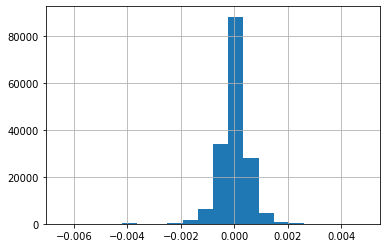

In [27]:
pandas.Series(Y_train.ravel()).hist(bins=20)

In [22]:
"""
naive analysis
"""

model = LinearRegression()
model.fit(X_train, Y_train)
Y_hat_train = model.predict(X_train)
Y_hat_test = model.predict(X_test)
print(r2_adj(Y_train, Y_hat_train, X_train.shape[0], X_train.shape[1]))
print(r2_score(Y_train, Y_hat_train))
print(r2_adj(Y_train, Y_hat_train, X_train.shape[0], X_train.shape[1]))
print(r2_score(Y_train, Y_hat_train))

NameError: name 'r2_adj' is not defined

In [28]:
"""
model realisation party A-00-1-SK: sklearn-interfaced models
"""
pass

In [29]:
# models
# all of them are stored in .json file with possible parameters

import json

with open('./models_params_mini.json') as f:
    models_params = json.load(f)

models_params

{'LinearRegression': {'n_jobs': [-1]},
 'ElasticNet': {'alpha': [0.01, 0.1, 0.95],
  'l1_ratio': [0.1, 0.95],
  'max_iter': [10000]},
 'KNeighborsRegressor': {'n_neighbors': [5, 10],
  'weights': ['uniform', 'distance'],
  'p': [1],
  'n_jobs': [-1]},
 'LinearSVR': {'epsilon': [0.1, 0.5, 1.0],
  'C': [0.1, 1.0, 10.0],
  'max_iter': [10000]},
 'SVR': {'kernel': ['poly', 'rbf', 'sigmoid'],
  'gamma': ['auto', 'scale'],
  'C': [0.1, 1.0, 10.0],
  'epsilon': [0.1, 1.0],
  'shrinking': [True],
  'max_iter': [10000]},
 'NuSVR': {'nu': [0.1, 0.5, 1.0],
  'C': [0.1, 1.0, 10.0],
  'kernel': ['poly', 'rbf', 'sigmoid'],
  'gamma': ['auto', 'scale'],
  'shrinking': [True],
  'max_iter': [10000]},
 'DecisionTreeRegressor': {'splitter': ['best', 'random'],
  'max_depth': [None, 10, 5],
  'max_features': ['auto']},
 'ExtraTreesRegressor': {'n_estimators': [1000],
  'max_depth': [None, 10, 5, 2],
  'max_features': ['auto'],
  'n_jobs': [-1]},
 'RandomForestRegressor': {'n_estimators': [1000],
  'max_d

In [30]:
def multiply_params(params):
    keys = numpy.array(list(params.keys()))
    dims = numpy.array([len(params[keys[j]]) for j in numpy.arange(keys.shape[0])])
    result = []
    for j in numpy.arange(dims.prod()):
        curr = j
        res = {}
        for k in numpy.arange(keys.shape[0]):
            ix = curr % dims[k]
            res[keys[k]] = params[keys[k]][ix]
            curr = curr // dims[k]
        result.append(res)
    return result


In [31]:
def r2_adj(y_true, y_pred, dim0, dim1):
    r2 = r2_score(y_true, y_pred)
    result = 1 - (1 - r2) * (dim0 - 1) / (dim0 - dim1 -1)
    return result

In [32]:
X_train.shape, X_test.shape

((164502, 11), (41126, 11))

In [33]:
dim_transform = 0
for transformer_name, transformer_params in transformers.items():
    multiple_transformer_params = multiply_params(transformer_params)
    dim_transform += len(multiple_transformer_params)
dim_transform

7

In [34]:
dim_models = 0
for model_name, model_args in models_params.items():
    multiple_model_args = multiply_params(model_args)
    dim_models += len(multiple_model_args)
dim_models

283

In [35]:
print('Total N of experiments: {}'.format(dim_transform * dim_models))

Total N of experiments: 1981


In [ ]:
# well, let's loop over that all (NO GOD PLEASE NOOOOOO)
# (kind: nofolds)

scorer = r2_adj
report = pandas.DataFrame(columns=['XP', 'trans', 'trans_p', 'model', 'model_p', 'sc_train', 'sc_test', 'time'])
verbose_step = 10

#_ = 1
xp = 1
total_time = time.time()
for transformer_name, transformer_params in transformers.items():
    multiple_transformer_params = multiply_params(transformer_params)
    for transformer_param in multiple_transformer_params:
        x_transformer, y_transformer = locals()[transformer_name](**transformer_param), locals()[transformer_name](**transformer_param)
        x_transformer.fit(X_train)
        y_transformer.fit(Y_train)
        for model_name, model_args in models_params.items():
            multiple_model_args = multiply_params(model_args)
            for model_arg in multiple_model_args:
                model_time = time.time()
                model = locals()[model_name](**model_arg)
                X_train_transformed = x_transformer.transform(X_train)
                X_test_transformed = x_transformer.transform(X_test)
                Y_train_transformed = y_transformer.transform(Y_train)
                model.fit(X_train_transformed, Y_train_transformed.ravel())
                Y_hat_train_transformed = model.predict(X_train_transformed)
                Y_hat_test_transformed = model.predict(X_test_transformed)
                Y_hat_train = y_transformer.inverse_transform(Y_hat_train_transformed.reshape(-1, 1))
                Y_hat_test = y_transformer.inverse_transform(Y_hat_test_transformed.reshape(-1, 1))
                score_train = scorer(Y_train, Y_hat_train, X_train.shape[0], X_train.shape[1])
                score_test = scorer(Y_test, Y_hat_test, X_test.shape[0], X_test.shape[1])
                model_time = time.time() - model_time
                result = {'XP': xp, 'trans': transformer_name, 'trans_p': str(transformer_param), 'model': model_name, 'model_p': str(model_arg), 'sc_train': score_train, 'sc_test': score_test, 'time': model_time}
                report = report.append(result, ignore_index=True)
                #if _ == 1:
                #    print(model_name)
                if xp % verbose_step == 0:
                    print(xp)
                xp += 1
        _ += 1
total_time = time.time() - total_time
print('N experiments: {0:10}; Spent time: {1:.0f}h {2:.0f}m {3:.0f}s'.format(xp, (total_time // 3600), ((total_time // 60) % 60), ((total_time % 3600) % 60)))

10


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


20


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

30


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

40


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

50


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

60


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

70


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

80


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

90


E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
E:\venv\financial_news_re\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

In [ ]:
report.sort_values(by=['sc_test'])

In [ ]:
"""
model group A-01

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + time axis
"""
pass

In [11]:
"""
model group A-02

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + other targets
"""
pass

In [12]:
"""
model group A-03

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + time axis + other targets
"""
pass

In [13]:
"""
model group A-04

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + news
"""
pass

In [14]:
"""
model group A-05

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + time axis + news
"""
pass

In [15]:
"""
model group A-06

targets: prc increase D2D for {open price; close price; max price; min price; volume}
fields: any transform of the target + time axis + news + other targets
"""
pass